# Simple Linear Regression Analysis

Consider the relationship between the total weight of a shipment of 50-pound bags of flour, `y` and the number of bags in the shipment, `x`. From the records of past our shipments, 30 shipments were randomly chosen and the data can be found in `flour.csv`, which contains:
- `weight`: weight of the shipment
- `bag`: number of 50-pound bags in the shipment

In [1]:
# Loading data set
data <- read.csv("flour.csv",header=T)
head(data) #First 5 rows of the data set

weight,bag
5050,100
10249,205
22248,435
7420,150
24685,500
10206,200


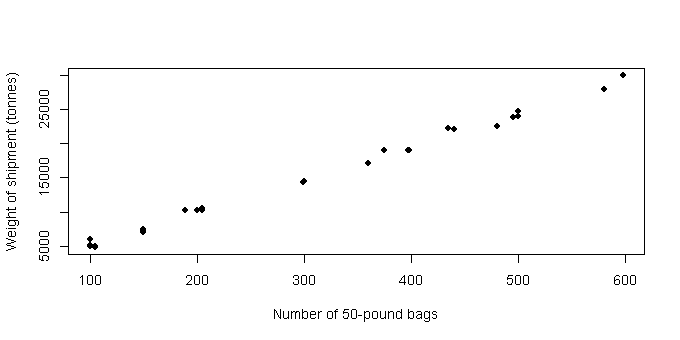

In [2]:
# Scatterplot of weight vs bags
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 85)
plot(data$weight~data$bag, xlab = "Number of 50-pound bags", ylab = "Weight of shipment (tonnes)", 
     pch = 16,cex = 1)

In [3]:
# Fitting a simple linear regression model
model <- lm(weight~bag,data=data)
beta.hat <- coef(model)
beta.hat

(Intercept)         bag 
  170.48804    48.53571

Let `y` be the weight of shipment and `x` is the number of 50-pound bags in the shipment, the line of best fit is
$\hat{y} = 170.48804 + 48.5357x$.

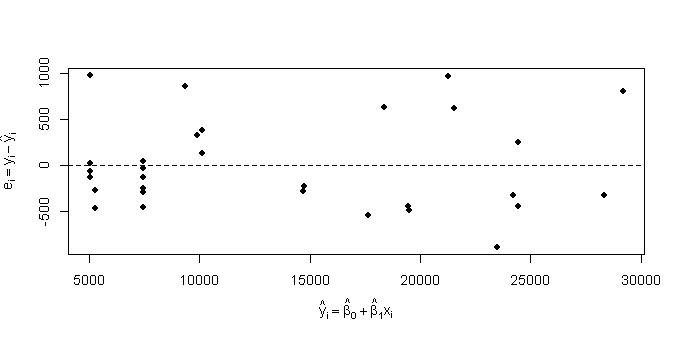

In [4]:
# Plot the residual vs. fitted values
yhat <- predict(model) #point estimates at x's in data
res <- resid(model) #residuals
sigma.hat <- sqrt(sum(res^2)/model$df)
z <- res/sigma.hat #standardized residuals

plot(yhat,res,pch = 16, cex = 1, xlab = expression(hat(y)[i]==hat(beta)[0] + hat(beta)[1]*x[i]), ylab = expression(e[i]==y[i]-hat(y)[i]))
abline(h = 0, lty = 2)

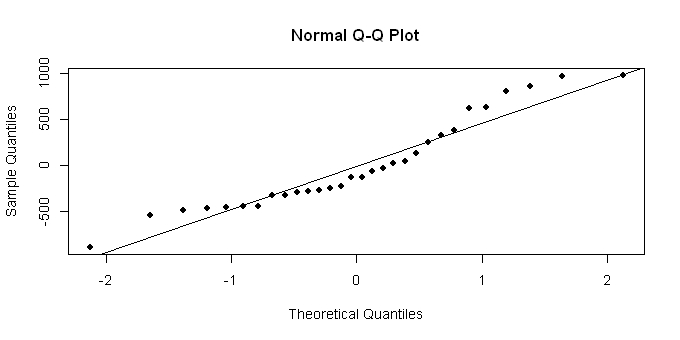

In [5]:
# QQ-plot of the standardized residuals
qqnorm(res,pch = 16, cex = 1) #QQ plot
abline(qqline(res),col = "red", lty = 2) 

The residual plot does not show any obvious pattern. However, most of the points in the QQ-plot do not lie on the straight line, suggesting potential problem with the model.

Since a shipment containing zero bag has a total weight of zero, a straight-line model of the relationship between `x` and `y` should pass through the point `x = 0` and `y = 0`.

In [6]:
# Find the least squares line for the given data under the assumption that B_0 = 0
model2 <- lm(weight~bag-1,data=data)
beta.hat <- coef(model2)
beta.hat

bag 
48.99035

Let `y` be the weight of shipment and `x` is the number of 50-pound bags in the shipment, the line of best fit is
$\hat{y} = 48.9904x$.

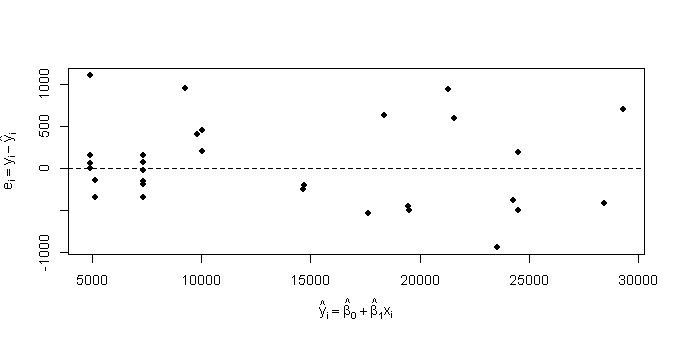

In [7]:
# Based on the model2, plot the residual vs. fitted values
yhat2 <- predict(model2)
res2 <- resid(model2) 
sigma.hat2 <- sqrt(sum(res2^2)/model2$df)
z2 <- res2/sigma.hat2

plot(yhat2,res2,pch = 16, cex = 1, xlab = expression(hat(y)[i]==hat(beta)[0] + hat(beta)[1]*x[i]), ylab = expression(e[i]==y[i]-hat(y)[i]))
abline(h = 0, lty = 2)

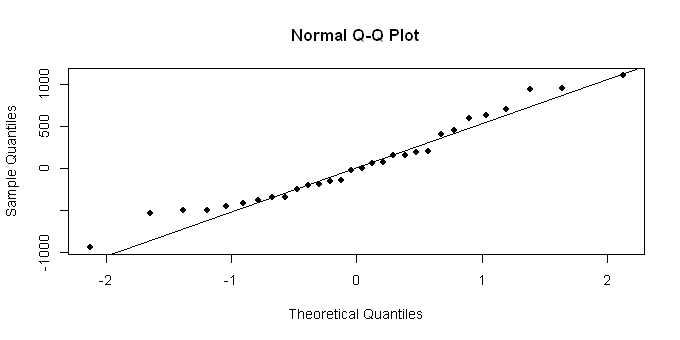

In [8]:
qqnorm(res2,pch = 16, cex = 1) #QQ plot
abline(qqline(res2),col = "red", lty = 2) 

The residual plot does not show any obvious pattern, indicating no obvious violation of assumptions. The points in the QQ-plot lie closer to the straight line, except a few on the far left. It is reasonable to conclude that there is
no violation of assumptions.

In [9]:
summary(model)


Call:
lm(formula = weight ~ bag, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-887.6 -321.1 -125.0  307.9  975.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 170.4880   184.9878   0.922    0.365    
bag          48.5357     0.5687  85.351   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 504 on 28 degrees of freedom
Multiple R-squared:  0.9962,	Adjusted R-squared:  0.996 
F-statistic:  7285 on 1 and 28 DF,  p-value: < 2.2e-16


Based on the above summary of the first model, which contains the intercept, shows that the p-value for the hypothesis test $H_{0}: \beta_0 = 0$ vs $H_{a}: \beta_0 \neq 0$, is 0.365. The p-value indicates no evidence to reject $H_{0}$, and hence, it is reasonable to exclude the intercept from the model. From hereon, we will use the model without an intercept.

In [10]:
# Based on the recommended model, construct and interpret the 99% CI for the slope
confint(model2,level=0.99)

,0.5 %,99.5 %
bag,48.21266,49.76805


We are 99% confident that the true, but unknown slope lies between 48.2127 and 49.7681.